Inferring demography and mutation spectrum history for human populations
==
- Plots using nextflow pipeline output in `output/` directory

In [1]:
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import defaultdict
import seaborn as sns
from sklearn.decomposition import PCA
import umap
import tensorly
from tensorly.decomposition import non_negative_parafac
import pandas as pd
import mushi.composition as cmp

mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"

/net/gs/vol1/home/wsdewitt/miniconda3/envs/1KG/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


## Inspect one population

In [2]:
t_gen = 29

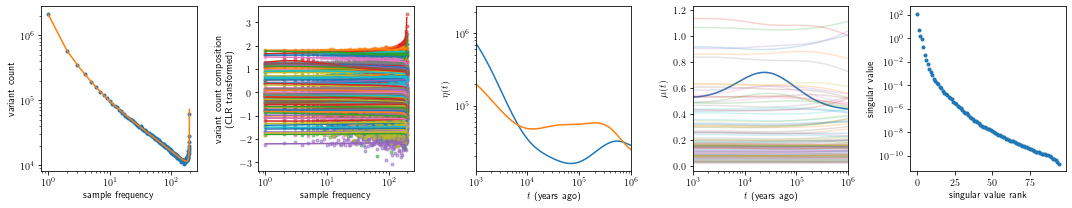

In [198]:
ksfs = pickle.load(open('output/mush/EUR_CEU/dat.pkl', 'rb'))[-2]
ksfs_ref = pickle.load(open('output/mush/AFR_YRI/dat.pkl', 'rb'))[-2]

# ksfs.clear_eta()
# ksfs.r = 0
# ksfs.infer_eta(ksfs.mu0, (0, 1e2), (3, 1e0), ridge_penalty=1e4, eta_ref=ksfs_ref.eta,
# #                folded=True,
#                pts=ksfs_ref.eta.m - 1, ta=ksfs_ref.eta.change_points[-1],
#                max_iter=500, trend_kwargs=dict(max_iter=30), verbose=True)
# ksfs.clear_mu()
# ksfs.r_vector = None
# ksfs.infer_mush((0, 1e2), (3, 1e1), rank_penalty=1e2, hard=False, ridge_penalty=1e-4, #mu_ref=ksfs_ref.mu,
# #                 misid_penalty=1e2,
#                 max_iter=300, trend_kwargs=dict(max_iter=30), verbose=True)

plt.figure(figsize=(15, 3))

plt.subplot(151)
# ksfs_ref.plot_total()
ksfs.plot_total()
plt.xscale('log')
plt.yscale('log')

plt.subplot(152)
# ksfs.plot(('TCC>TTC', 'GAA>GGA'), clr=True, kwargs=dict(ls='', marker='.', alpha=0.5))
ksfs.plot(clr=True, kwargs=dict(ls='', marker='.', alpha=0.5))

plt.subplot(153)
ksfs.eta.plot(t_gen=t_gen)
ksfs_ref.eta.plot(t_gen=t_gen)
plt.xlim(1e3, 1e6)
# plt.ylim(1e4, 1e6)

plt.subplot(154)
ksfs.mu.plot(('TCC>TTC',), t_gen=t_gen)
ksfs.mu.plot(t_gen=t_gen, alpha=.2)
plt.xlim(1e3, 1e6);

plt.subplot(155)
plt.plot(np.linalg.svd(cmp.ilr(ksfs.mu.Z), compute_uv=False), '.')
plt.yscale('log')
plt.xlabel('singular value rank')
plt.ylabel('singular value')

plt.tight_layout()
plt.show()

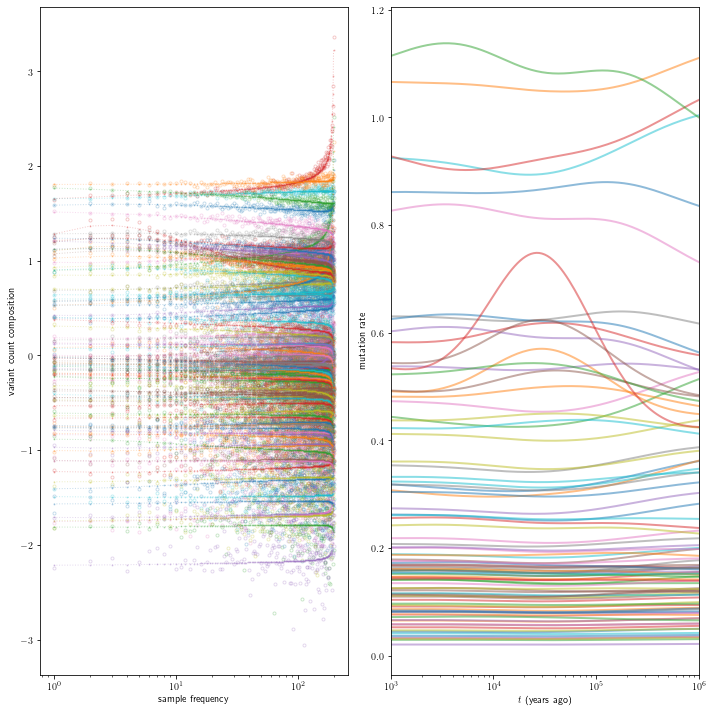

In [151]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
ksfs.plot(clr=True, kwargs=dict(alpha=0.25, ls='', marker='o',
                                          ms=3, mfc='none', rasterized=True),
                    line_kwargs=dict(ls=':', marker='.', ms=2, alpha=0.25,
                                     lw=1, rasterized=True))
plt.ylabel('variant count composition')
plt.subplot(122)
ksfs.μ.plot(t_gen=t_gen, clr=False, alpha=0.5, lw=2)
plt.xscale('log')
plt.ylabel('mutation rate')
plt.xlim([1e3, 1e6])
plt.tight_layout()
plt.show()

<AxesSubplot:>

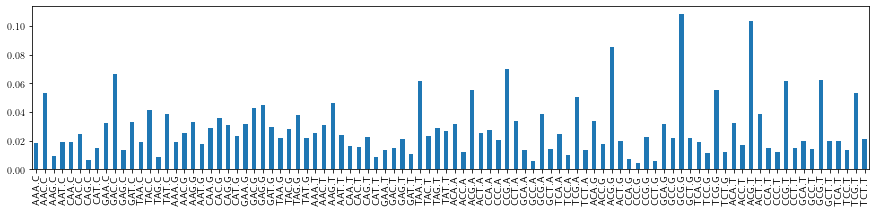

In [199]:
plt.figure(figsize=(15, 3))
df = pd.Series(ksfs.r_vector, index=[x[:3] + '.' + x[5] for x in ksfs.mutation_types.values], name='misid rate')
df.plot.bar()

In [38]:
for x, y in zip(ksfs.mutation_types, ksfs.r_vector):
    print(f'{x}\t{y}')

AAA>ACA	0.01847188737534346
AAC>ACC	0.05549989754285656
AAG>ACG	0.008944506320156618
AAT>ACT	0.01916174465411155
CAA>CCA	0.018819941951134053
CAC>CCC	0.023774776160559015
CAG>CCG	0.006691611694951592
CAT>CCT	0.015131981788746435
GAA>GCA	0.03256370312363682
GAC>GCC	0.06655176444140987
GAG>GCG	0.013816603599485227
GAT>GCT	0.03343009209993787
TAA>TCA	0.018022354103661913
TAC>TCC	0.0415351439632427
TAG>TCG	0.009772616494346707
TAT>TCT	0.03817823062626872
AAA>AGA	0.019444079159286393
AAC>AGC	0.025045815668862072
AAG>AGG	0.03353009189963305
AAT>AGT	0.0178384948725643
CAA>CGA	0.02937452044078251
CAC>CGC	0.03659071452073491
CAG>CGG	0.030910642310573132
CAT>CGT	0.023584017019536732
GAA>GGA	0.03246482422019699
GAC>GGC	0.043674521061444246
GAG>GGG	0.046674648842653474
GAT>GGT	0.030076649849440206
TAA>TGA	0.022193074860924505
TAC>TGC	0.028462846782323963
TAG>TGG	0.03749108283927878
TAT>TGT	0.022215010244989123
AAA>ATA	0.02595552331659458
AAC>ATC	0.03250050761088339
AAG>ATG	0.04907319664639277
AAT>

## Bootstrap samples

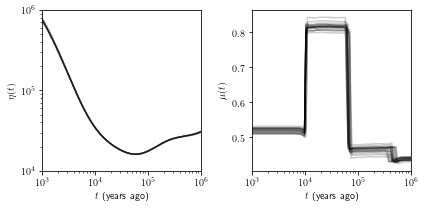

In [200]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
for f in glob.glob('output/bootstrap/*/dat*'):
    ksfs = pickle.load(open(f, 'rb'))[-2]

    plt.sca(axes[0])
    ksfs.eta.plot(t_gen=t_gen, alpha=0.1, c='k')

    plt.sca(axes[1])
    ksfs.mu.plot(('TCC>TTC',), t_gen=t_gen, alpha=0.2, c='k')
    
plt.sca(axes[0])
plt.xlim(1e3, 1e6)
plt.ylim(1e4, 1e6)

plt.sca(axes[1])
plt.xlim(1e3, 1e6)

plt.tight_layout()
plt.savefig('plots/bootstrap.pdf')

## $\eta$ parameter sweep for CEU population

In [201]:
sweep_data = defaultdict(list)

for i, f in enumerate(glob.glob('output/eta_sweep/*/EUR_CEU/dat*')):
    alpha_params, beta_params, ksfs, population = pickle.load(open(f, 'rb'))
    k, λ = alpha_params[0]
    sweep_data[k].append([λ, ksfs.loss(), ksfs])

# delta loss
for k in sorted(sweep_data):
    sweep_data[k] = np.array(sorted(sweep_data[k]))
    sweep_data[k][:, 1] = sweep_data[k][:, 1] - sweep_data[k][0, 1]

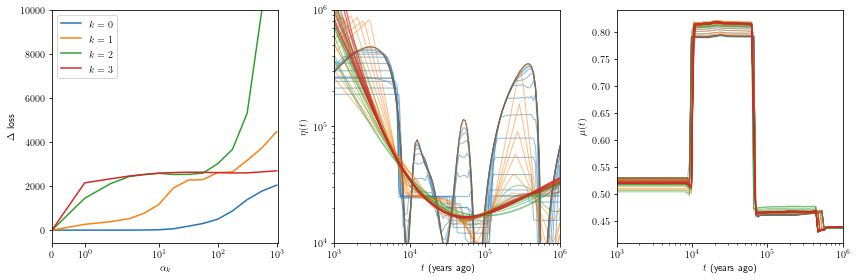

In [202]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

max_idx = 14

for k in range(4):
    
    plt.sca(axes[0])
    λs, losss, ksfss = sweep_data[k][:max_idx].T
    plt.plot(λs, losss, label=f'$k={k}$')
    
    for λ, loss, ksfs in zip(λs, losss, ksfss):
#         if (k, λ) in ((0, λs[10]), (1, λs[4]), (2, λs[8]), (3, λs[5])):

#             plt.sca(axes[0])
#             plt.plot(λ, loss, alpha=0.5, marker='o', color=f'C{k}', markeredgecolor='k', ms=10)

        plt.sca(axes[1])
        ksfs.eta.plot(t_gen=t_gen, alpha=0.5, lw=1, color=f'C{k}')

        plt.sca(axes[2])
        ksfs.mu.plot(('TCC>TTC', ), t_gen=t_gen, alpha=0.5, lw=1, color=f'C{k}')

plt.sca(axes[0])
plt.xlabel(r'$\alpha_k$')
plt.ylabel(r'$\Delta$ loss')
plt.xscale('symlog')
plt.ylim(None, 1e4)
# plt.yscale('symlog')
plt.legend()


plt.sca(axes[0])
plt.xlim(0, None)
plt.sca(axes[1])
plt.xlim(1e3, 1e6)
plt.ylim(1e4, 1e6)
plt.sca(axes[2])
plt.xlim(1e3, 1e6)

plt.tight_layout()
plt.savefig('plots/eta_sweep.pdf')

## $\boldsymbol\mu$ parameter sweep for CEU population

In [203]:
sweep_data = defaultdict(list)

for i, f in enumerate(glob.glob('output/mu_sweep/*/EUR_CEU/dat*')):
    alpha_params, beta_params, ksfs, population = pickle.load(open(f, 'rb'))
    k, λ = beta_params[0]
    sweep_data[k].append([λ, ksfs.loss(), ksfs])

# delta loss
for k in sorted(sweep_data):
    sweep_data[k] = np.array(sorted(sweep_data[k]))
    sweep_data[k][:, 1] = sweep_data[k][:, 1] - sweep_data[k][0, 1]

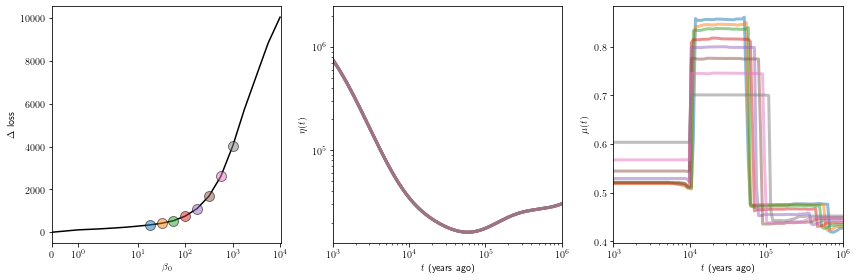

In [204]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for k in (0,): #range(4):
    
    plt.sca(axes[0])
    λs, losss, ksfss = sweep_data[k].T
    plt.plot(λs, losss, label=f'$k={k}$', c='k')
    
    for λ, loss, ksfs in zip(λs, losss, ksfss):
        if 1e1 < λ < 1.5e3:

            plt.sca(axes[0])
            plt.plot(λ, loss, alpha=0.5, marker='o', ms=10, markeredgecolor='k')#, color=f'C{k}')

            plt.sca(axes[1])
            ksfs.eta.plot(t_gen=t_gen, alpha=0.5, lw=3)#, color=f'C{k}')
            
            plt.sca(axes[2])
            ksfs.mu.plot(('TCC>TTC', ), t_gen=t_gen, alpha=0.5, lw=3)#, color=f'C{k}')

plt.sca(axes[0])
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\Delta$ loss')
plt.xscale('symlog')
# plt.ylim(None, 4e3)
# plt.yscale('symlog')
# plt.legend()


plt.sca(axes[0])
plt.xlim(0, None)
plt.sca(axes[1])
plt.xlim(1e3, 1e6)
plt.sca(axes[2])
plt.xlim(1e3, 1e6)

plt.tight_layout()
plt.savefig('plots/mu_sweep.pdf')

## Point estimates for TCC pulse
- Make a tidy plot with the regularization parameters indicated by points in previous plots
- Use all EUR populations

mushi


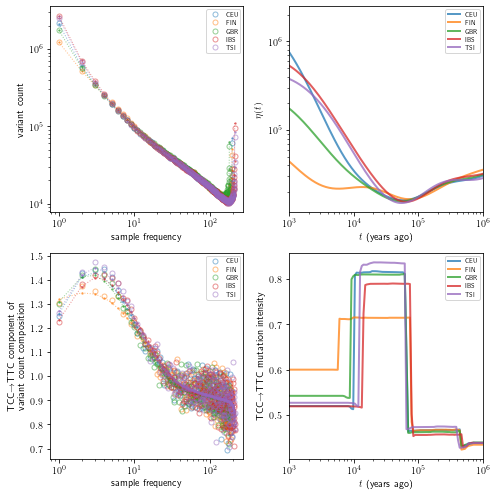

Relate


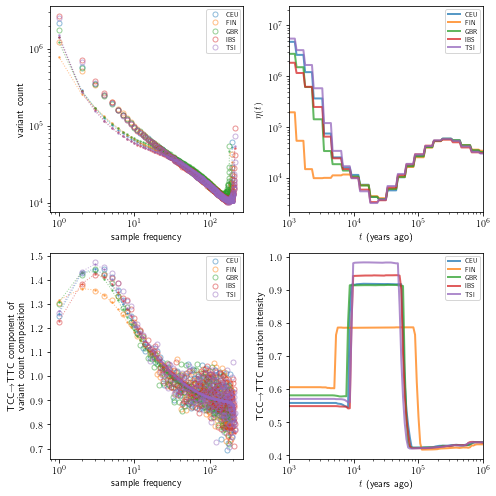

Tennessen


In [ ]:
for method in ('mushi', 'Relate', 'Tennessen'):
    print(method)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

    files = sorted(glob.glob(f'output/europulse_{method}/*/dat.pkl'))
    for idx, file in enumerate(files):
        pop = file.split('/')[2].split('_')[1]
        beta_params, ksfs, population = pickle.load(open(file, 'rb'))[-3:]
        
        plt.sca(axes[0, 0])
        ksfs.plot_total(kwargs=dict(ls='', alpha=0.5, marker='o', ms=5, mfc='none', c=f'C{idx}', label=pop, rasterized=True),
                        line_kwargs=dict(c=f'C{idx}', ls=':', marker='.', ms=3, alpha=0.5, lw=1, rasterized=True),
                        fill_kwargs=dict(color=f'C{idx}', alpha=0))
        plt.xscale('log')
        plt.yscale('log')
        plt.legend(fontsize=6, loc='upper right')
        if idx < len(files) - 1:
            plt.xlabel(None)

        plt.sca(axes[0, 1])
        ksfs.eta.plot(t_gen=t_gen, lw=2, label=pop, alpha=0.75, c=f'C{idx}')
        plt.xlim([1e3, 1e6])
        plt.legend(fontsize=6, loc='upper right')
        if idx < len(files) - 1:
            plt.xlabel(None)

        plt.sca(axes[1, 0])
        ksfs.plot(('TCC>TTC',), clr=True,
                  kwargs=dict(ls='', c=f'C{idx}', marker='o', ms=5, mfc='none', alpha=0.5, label=pop, rasterized=True),
                  line_kwargs=dict(c=f'C{idx}', ls=':', marker='.', ms=3, alpha=0.5, lw=1, rasterized=True))
        plt.ylabel('TCC$\\to$TTC component of\nvariant count composition')
        plt.legend(fontsize=6)

        plt.sca(axes[1, 1])
        plt.gca().set_prop_cycle(None)
        ksfs.mu.plot(('TCC>TTC',), t_gen=t_gen, clr=False, c=f'C{idx}', alpha=0.75, lw=2, label=pop)
        plt.ylabel('TCC$\\to$TTC mutation intensity')
        plt.xlim([1e3, 1e6])
        plt.legend(fontsize=6)

    plt.tight_layout()
    plt.savefig(f'plots/europulse_{method}.pdf')
    plt.show()

## Inferring $\eta$ from folded SFS for each population

In [159]:
files = glob.glob('output/mush_folded/*/dat.pkl')

ksfs_dict = {}
pops = defaultdict(list)

for file in files:
    super_pop, pop = file.split('/')[2].split('_')
    alpha_params, beta_params, ksfs, population = pickle.load(open(file, 'rb'))
    pops[super_pop].append(pop)
    ksfs_dict[pop] = ksfs

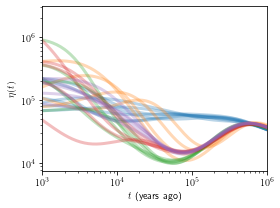

In [160]:
fig = plt.figure(figsize=(4, 3))
for idx_super, super_pop in enumerate(sorted(pops)):
    for idx, pop in enumerate(reversed(pops[super_pop])):
        ksfs_dict[pop].eta.plot(t_gen=t_gen, lw=3, label=super_pop if idx == 0 else None, alpha=0.3, c=f'C{idx_super}')
        plt.xlim([1e3, 1e6])
plt.tight_layout()
plt.savefig('plots/etas_folded.pdf')

## Inferring $\eta$ from unfolded SFS for each population

In [163]:
files = glob.glob('output/mush/*/dat.pkl')

ksfs_dict = {}
pops = defaultdict(list)

for file in files:
    super_pop, pop = file.split('/')[2].split('_')
    alpha_params, beta_params, ksfs, population = pickle.load(open(file, 'rb'))
    pops[super_pop].append(pop)
    ksfs_dict[pop] = ksfs

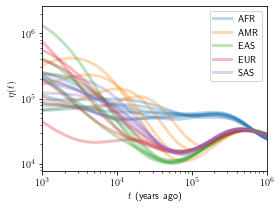

In [164]:
fig = plt.figure(figsize=(4, 3))
for idx_super, super_pop in enumerate(sorted(pops)):
    for idx, pop in enumerate(reversed(pops[super_pop])):
        ksfs_dict[pop].eta.plot(t_gen=t_gen, lw=3, label=super_pop if idx == 0 else None, alpha=0.3, c=f'C{idx_super}')
        plt.xlim([1e3, 1e6])
plt.legend(loc='upper right', fontsize=9)
plt.tight_layout()
plt.savefig('plots/etas.pdf')

Same as above, stratified by super-population, and including SFS fit

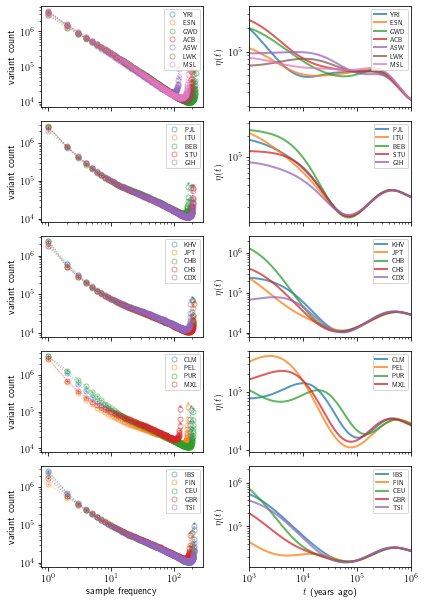

In [167]:
fig, axes = plt.subplots(len(pops), 2, sharex='col', figsize=(6, 1.7 * len(pops)), squeeze=False)
for idx_super, super_pop in enumerate(pops):
    for idx, pop in enumerate(pops[super_pop]):
        plt.sca(axes[idx_super, 0])
        ksfs_dict[pop].plot_total(folded=False,
                                  kwargs=dict(ls='', alpha=0.5, marker='o', ms=5, mfc='none', c=f'C{idx}', label=pop, rasterized=True),
                                  line_kwargs=dict(c=f'C{idx}', ls=':', marker='.', ms=3, alpha=0.5, lw=1, rasterized=True),
                                  fill_kwargs=dict(color=f'C{idx}', alpha=0))
        plt.xscale('log')
        plt.yscale('log')
        plt.legend(fontsize=6, loc='upper right')
        if idx_super < len(pops) - 1:
            plt.xlabel(None)
        plt.sca(axes[idx_super, 1])
        ksfs_dict[pop].eta.plot(t_gen=t_gen, lw=2, label=pop, alpha=0.75, c=f'C{idx}')
        plt.xlim([1e3, 1e6])
        plt.legend(fontsize=6, loc='upper right')
        if idx_super < len(pops) - 1:
            plt.xlabel(None)
plt.tight_layout()
plt.savefig('plots/sfsetas.pdf')

## $k$-SFS and inferred $\boldsymbol\mu$

EUR CEU


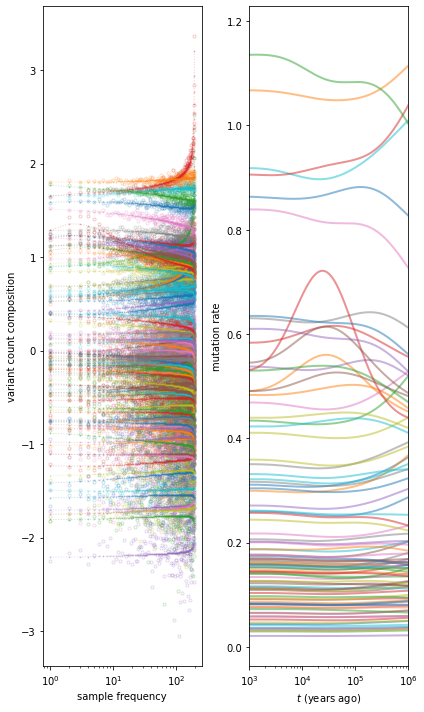

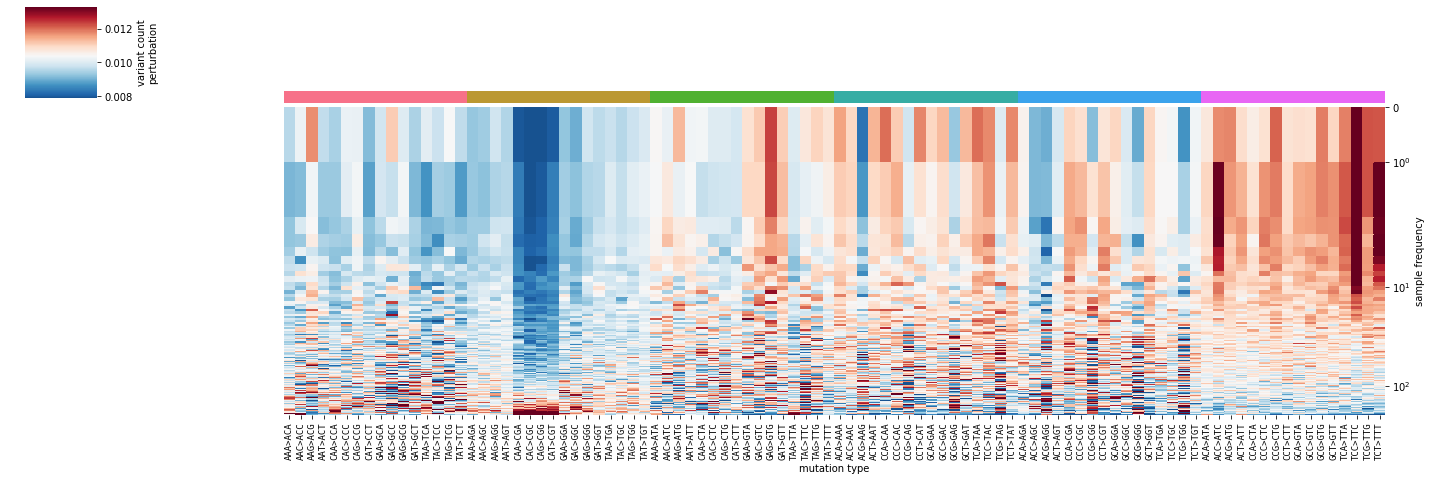

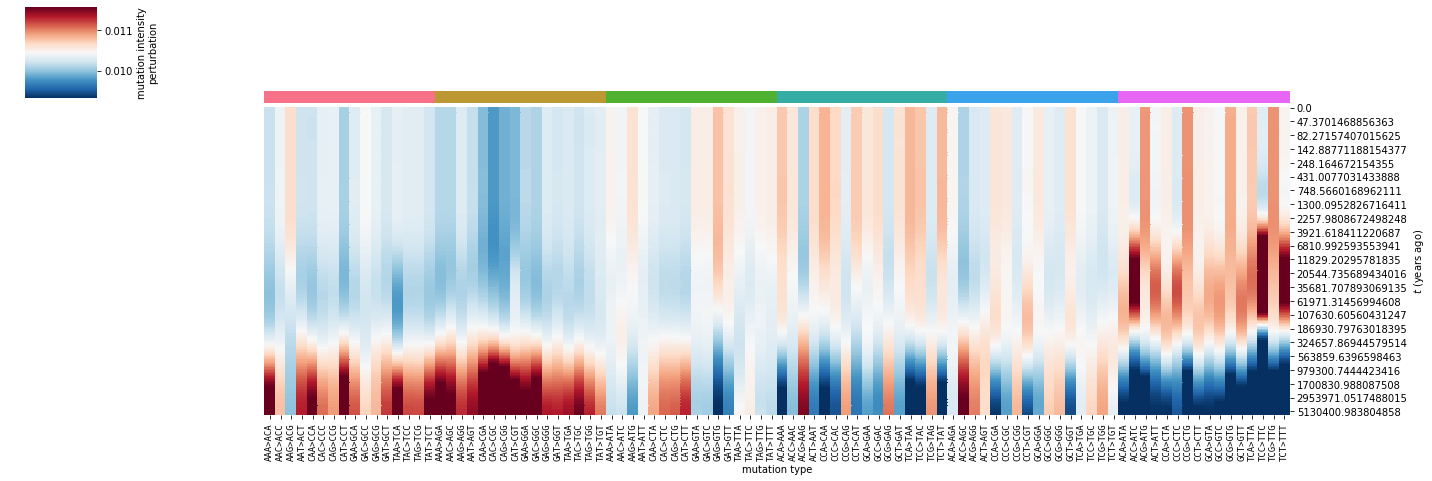

In [168]:
with mpl.rc_context(rc={'text.usetex': False}):
    super_pop = 'EUR'
    pop = 'CEU'
#     for idx_super, super_pop in enumerate(sorted(pops)):
#         for idx, pop in enumerate(reversed(pops[super_pop])):
    print(super_pop, pop)

    plt.figure(figsize=(6, 10))
    plt.subplot(121)
    ksfs_dict[pop].plot(clr=True, kwargs=dict(alpha=0.25, ls='', marker='o',
                                              ms=3, mfc='none', rasterized=True),
                        line_kwargs=dict(ls=':', marker='.', ms=2, alpha=0.25,
                                         lw=1, rasterized=True))
    plt.ylabel('variant count composition')
    plt.subplot(122)
    ksfs_dict[pop].μ.plot(t_gen=t_gen, clr=False, alpha=0.5, lw=2)
    plt.xscale('log')
    plt.ylabel('mutation rate')
    plt.xlim([1e3, 1e6])
    plt.tight_layout()
    plt.savefig('plots/mushfit.pdf')
    plt.show()

    singlets = [f'{anc}>{der}' for anc, der in zip(ksfs_dict[pop].mutation_types.str[1],
                                                   ksfs_dict[pop].mutation_types.str[5])]

    ksfs_dict[pop].mutation_types.str[1].str.cat(ksfs_dict[pop].mutation_types.str[5], sep='>')

    pal = sns.color_palette('husl', n_colors=6)
    col_map = {'A>C': pal[0], 'A>G': pal[1], 'A>T': pal[2], 'C>A': pal[3], 'C>G': pal[4], 'C>T': pal[5]}
    col_colors = [col_map[singlet] for singlet in singlets]

    ksfs_dict[pop].clustermap(figsize=(20, 7), col_cluster=False,
                              xticklabels=True, rasterized=True,
                              robust=True, cmap='RdBu_r',
                              col_colors=col_colors)
    plt.show()

    ksfs_dict[pop].μ.clustermap(t_gen=t_gen,
                                figsize=(20, 7), col_cluster=False, xticklabels=True, rasterized=True,
                                robust=True, cmap='RdBu_r',
                                col_colors=col_colors)
    plt.show()

#             # just first pop from each superpop
#             break
#         # break after first superpop
#         break

## Tensor decomposition and mutation signature dynamics
### Non-negative CP decomposition

Stack the MuSHs for each population, scaled to site-wise rates, to form a tensor of order 3

In [169]:
sorted_triplets = [f'{a5}{a}{a3}>{a5}{d}{a3}' for a in 'AC' for d in 'ACGT' if d != a for a5 in 'ACGT' for a3 in 'ACGT']
masked_genome_size = pd.read_csv('output/masked_size.tsv', sep='\t', header=None, index_col=0, names=('count',))
targets = np.array([masked_genome_size.loc[triplet.split('>')[0], 'count'] for triplet in sorted_triplets])

Z = np.concatenate([(ksfs_dict[pop].mu.Z / targets)[np.newaxis, :, :]
                    for super_pop in sorted(pops)
                    for pop in reversed(pops[super_pop])], 0)

NNCP decomposition to extract factors for each dimension: sample, time, and mutation type. We try a range of ranks and assess reconstruction error at each.

rank 1 decomposition, error = 0.025142113790571147
rank 2 decomposition, error = 0.02159765309015225
rank 3 decomposition, error = 0.020881735853776187
rank 4 decomposition, error = 0.020639138970477117
rank 5 decomposition, error = 0.019997372276008306


/net/gs/vol1/home/wsdewitt/miniconda3/envs/1KG/lib/python3.7/site-packages/tensorly/backend/core.py:780: RuntimeWarning: divide by zero encountered in true_divide
  V = np.dot(matrix.T.conj(), U * np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, 1/S)[None, :])


rank 6 decomposition, error = 0.019996846837190295
rank 7 decomposition, error = 0.01996987430583632
rank 8 decomposition, error = 0.019969874305804824
rank 9 decomposition, error = 0.01996987430582582
rank 10 decomposition, error = 0.019969874305804824


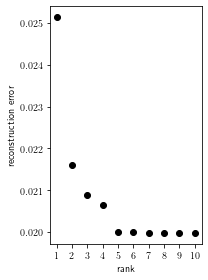

In [170]:
ranks = range(1, 11)
errors = []
tensors = {}
for rank in ranks:
    # NOTE: normalize_factors=True leads to instability for some reason
    tensor, error = non_negative_parafac(Z, rank=rank,
                                         orthogonalise=False, normalize_factors=False,
                                         tol=1e-10, n_iter_max=2000, cvg_criterion='rec_error',
                                         random_state=0, return_errors=True)
    print(f'rank {rank} decomposition, error = {error[-1]}')
    errors.append(error[-1])
    tensors[rank] = tensor[1]

plt.figure(figsize=(3, 4))
plt.plot(ranks, errors, 'ko')
plt.xlabel('rank')
plt.xticks(ranks)
plt.ylabel('reconstruction error')
plt.tight_layout()
plt.savefig('plots/elbow.pdf')

Choose rank

In [189]:
rank = 5
factors_sample, factors_history, factors_signature = tensors[rank]

### Project the sample dimension factors to two principal components

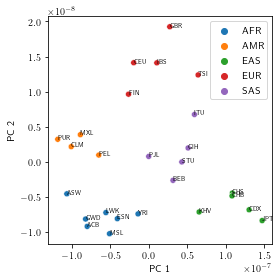

In [190]:
x, y = PCA(n_components=2).fit_transform(factors_sample).T
plt.figure(figsize=(4, 4))
sns.scatterplot(x=x, y=y, hue=[super_pop for super_pop in sorted(pops)
                               for pop in reversed(pops[super_pop])])
i = 0
for super_pop in sorted(pops):
    for pop in reversed(pops[super_pop]):
        plt.annotate(pop, (x[i], y[i]), size=6)
        i += 1
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.savefig('plots/factors_pop.pdf')

### Project the time dimension factors to two principal components

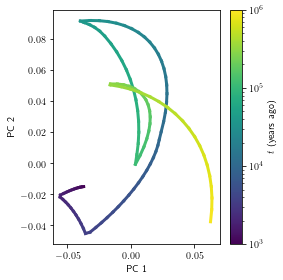

In [191]:
xy = PCA(n_components=2).fit_transform(factors_history)
idxs = (1e3 <= t_gen * ksfs_dict[pop].mu.arrays()[0][:-1]) & (t_gen * ksfs_dict[pop].mu.arrays()[0][:-1] <= 1e6)
plt.figure(figsize=(4, 4))
x = np.dstack((xy[idxs][:-1, 0], xy[idxs][1:, 0])).flatten()
y = np.dstack((xy[idxs][:-1, 1], xy[idxs][1:, 1])).flatten()
z = t_gen * np.dstack((ksfs_dict[pop].mu.arrays()[0][:-1][idxs][:-1], ksfs_dict[pop].mu.arrays()[0][:-1][idxs][:-1])).flatten()
norm = mpl.colors.LogNorm(vmin=1e3, vmax=1e6)
points = plt.scatter(x=x, y=y, c=z, s=0, norm=norm, cmap='viridis')
sns.lineplot(x=x, y=y, hue=z, hue_norm=norm, lw=3, legend=False, palette='viridis')
cbar= plt.colorbar(points)
cbar.set_label('$t$ (years ago)', rotation=90)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.tight_layout()
plt.savefig('plots/factors_history.pdf')

### Project the mutation type dimension factors to two principal components

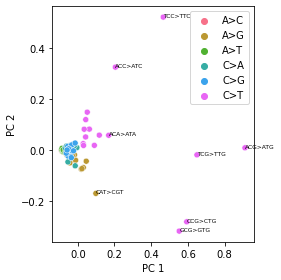

In [192]:
with mpl.rc_context(rc={'text.usetex': False}):
    singlets = [f'{anc}>{der}' for anc, der in zip(ksfs_dict[pop].mutation_types.str[1],
                                                   ksfs_dict[pop].mutation_types.str[5])]
    x, y = PCA(n_components=2).fit_transform(factors_signature).T
    plt.figure(figsize=(4, 4))
    sns.scatterplot(x=x, y=y, hue=singlets, palette='husl')
    for i, mutation_type in enumerate(ksfs_dict[pop].mu.mutation_types):
        if np.abs([x[i], y[i]]).max() > 0.15:
            plt.annotate(mutation_type, (x[i], y[i]), size=6)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.tight_layout()
    plt.savefig('plots/factors_mutation.pdf')

### Display mutation type loadings as mutation signatures

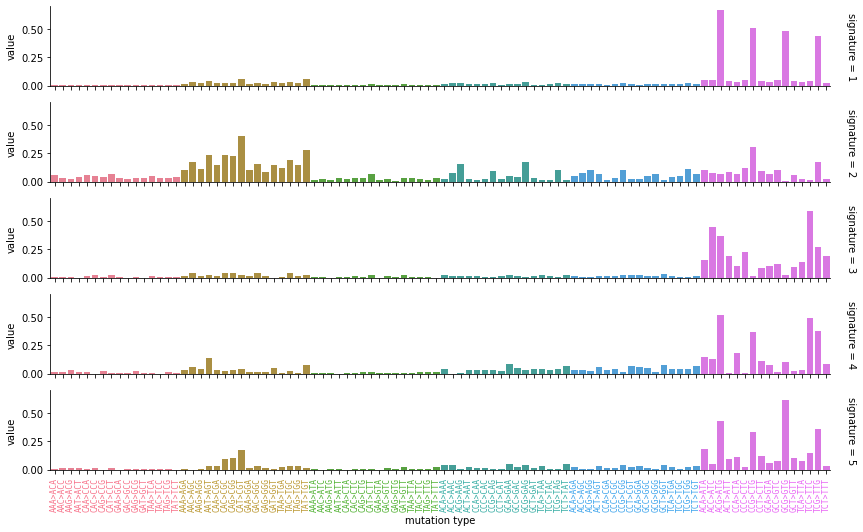

In [193]:
signature_df = pd.DataFrame(factors_signature,
                            columns=[i for i in range(1, factors_signature.shape[1] + 1)])
signature_df['mutation type'] = ksfs_dict[pop].mu.mutation_types
signature_df['singlet type'] = singlets

pal = sns.color_palette('husl', n_colors=6)
colors = {'A>C': pal[0], 'A>G': pal[1], 'A>T': pal[2],
          'C>A': pal[3], 'C>G': pal[4], 'C>T': pal[5]}
palette = [colors[singlet] for singlet in signature_df['singlet type']]
signature_df = signature_df.melt(id_vars=['mutation type', 'singlet type'], var_name='signature')

with mpl.rc_context(rc={'text.usetex': False}):
    g = sns.FacetGrid(signature_df, row='signature', aspect=8, height=1.5,
                      margin_titles=True, sharey=True)
    g = g.map(sns.barplot, 'mutation type', 'value',
              order=ksfs_dict[pop].mu.mutation_types,
              palette=palette)
    g.set_xticklabels(rotation=90, fontsize=8, family='monospace')
    for xtick, color in zip(g.axes.flat[-1].get_xticklabels(), palette):
        xtick.set_color(color)
    plt.tight_layout()
    plt.savefig('plots/signatures.pdf')

### Mutation signature dynamics in each population

- rows correspond to mutation signatures
- columns correspond to super populations

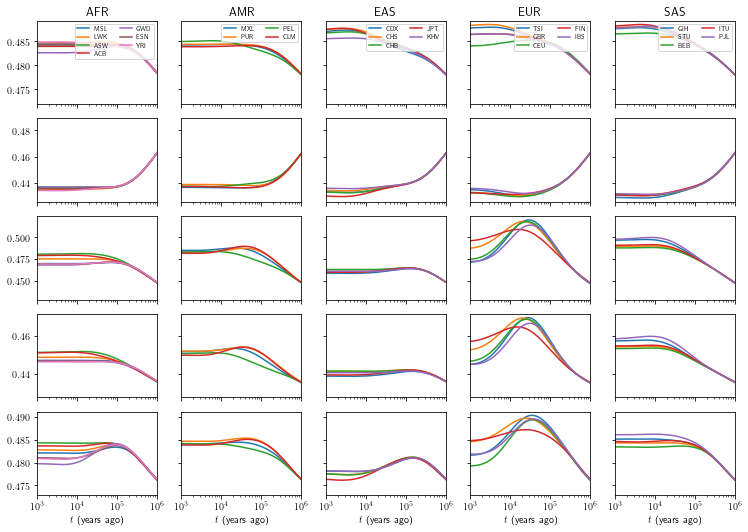

In [194]:
factors_signature_normed = factors_signature * targets[:, np.newaxis]
factors_signature_normed /= factors_signature_normed.sum(0, keepdims=True)

Z_transform = tensorly.tenalg.mode_dot(Z * targets[np.newaxis, np.newaxis, :], factors_signature_normed.T, mode=2)

fig, axes = plt.subplots(Z_transform.shape[2], len(pops), sharex=True, sharey='row', figsize=(2.1 * len(pops), 1.5 * Z_transform.shape[2]))
for k in range(Z_transform.shape[2]):
    i = 0
    for idx, super_pop in enumerate(sorted(pops)):
        plt.sca(axes[k, idx])
        for idx2, pop in enumerate(reversed(pops[super_pop])):
            plt.plot(t_gen * ksfs_dict[pop].mu.arrays()[0][:-1], Z_transform[i, :, k],
                     label=pop)
            plt.xscale('log')
            plt.xlim([1e3, 1e6])
            i += 1
        if k == 0:
            plt.title(super_pop)
            plt.legend(fontsize=6, loc='upper right', ncol=2)
        elif k == Z_transform.shape[2] - 1:
            plt.xlabel('$t$ (years ago)')
plt.tight_layout()
plt.savefig('plots/signature_histories.pdf')

The same histories overlayed for all populations

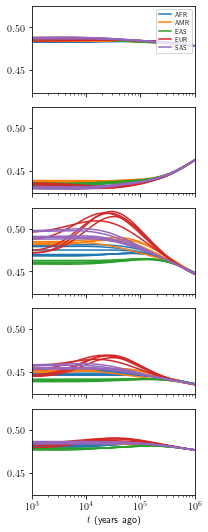

In [195]:
fig, axes = plt.subplots(Z_transform.shape[2], 1, sharex=True, sharey=True, figsize=(3, 1.5 * Z_transform.shape[2]))
for k in range(Z_transform.shape[2]):
    i = 0
    plt.sca(axes[k])
    for idx, super_pop in enumerate(sorted(pops)):
        for idx2, pop in enumerate(reversed(pops[super_pop])):
            plt.plot(t_gen * ksfs_dict[pop].mu.arrays()[0][:-1], Z_transform[i, :, k],
                     label=(super_pop if idx2 == 0 else None), c=f'C{idx}')
            plt.xscale('log')
            plt.xlim([1e3, 1e6])
            i += 1
    if k == 0:
        plt.legend(fontsize=6, loc='upper right')
plt.xlabel('$t$ (years ago)')
plt.tight_layout()
plt.savefig('plots/signature_histories_all.pdf')

## Global divergence in mutation spectra

### UMAP embedding of mutation signatures through time for all populations

In [196]:
time = t_gen * np.concatenate(([0], ksfs_dict[pop].μ.change_points))
time_mask = ((1e3 <= time) & (time <= 1e6))

np.random.seed(1)

embedding_init = PCA(n_components=2)
embedding_init.fit(factors_history[time_mask, :])

colors = {super_pop: f'C{idx}' for idx, super_pop in enumerate(sorted(pops))}

Z_dict = {}
i = 0
for super_pop in sorted(pops):
    for pop in reversed(pops[super_pop]):
        Z_dict[pop] = Z_transform[i, time_mask, :]
        i += 1

Z_stack = np.concatenate([Z_dict[pop] for super_pop in pops for pop in pops[super_pop]])
embedding = umap.UMAP(n_components=2,
                      n_epochs=1000,
                      init=embedding_init.transform(Z_stack),
                      random_state=1)
embedding.fit(Z_stack)


Z_transform_dict = {pop: embedding.transform(Z_dict[pop])
                    for super_pop in pops
                    for pop in pops[super_pop]}

inside function
   (0, 0)	1.0
  (0, 1)	0.80911756
  (0, 2)	0.647309
  (0, 3)	0.5123037
  (0, 4)	0.4015169
  (0, 5)	0.31160292
  (0, 6)	0.23994821
  (0, 7)	0.18344636
  (0, 8)	0.139524
  (0, 9)	0.10570728
  (0, 10)	0.07990893
  (0, 31)	0.07376268
  (0, 32)	0.11814689
  (0, 33)	0.1546862
  (0, 34)	0.12990671
  (1, 0)	0.7786672
  (1, 1)	1.0
  (1, 2)	0.7683168
  (1, 3)	0.5828308
  (1, 4)	0.43704808
  (1, 5)	0.32393068
  (1, 6)	0.23788528
  (1, 7)	0.17321353
  (1, 8)	0.1253483
  (1, 9)	0.09029234
  :	:
  (111, 676)	0.19752638
  (111, 789)	0.6355414
  (111, 1353)	0.07902897
  (111, 1467)	0.1605545
  (111, 1580)	0.34013084
  (111, 1693)	0.25401285
  (111, 1806)	0.25330344
  (111, 1919)	0.18338907
  (111, 2032)	0.07581973
  (111, 2258)	0.13887842
  (112, 112)	1.0
  (112, 225)	0.7636776
  (112, 338)	0.5881561
  (112, 451)	0.13577154
  (112, 564)	0.11462099
  (112, 677)	0.2014208
  (112, 790)	0.626284
  (112, 1129)	0.06206622
  (112, 1468)	0.16088885
  (112, 1581)	0.34745306
  (112, 1694)	0.2693

inside function
   (0, 904)	1.0
  (0, 905)	0.82307845
  (0, 906)	0.6710923
  (0, 907)	0.54222375
  (0, 908)	0.43443915
  (0, 909)	0.34525403
  (0, 910)	0.27233538
  (0, 911)	0.21328788
  (0, 912)	0.16599253
  (0, 913)	0.12848051
  (0, 914)	0.09892908
  (0, 915)	0.07586492
  (0, 916)	0.057999324
  (0, 917)	0.04422941
  (0, 918)	0.033684008
  (1, 904)	0.7897231
  (1, 905)	1.0
  (1, 906)	0.7806976
  (1, 907)	0.6027789
  (1, 908)	0.4606624
  (1, 909)	0.34856156
  (1, 910)	0.26133823
  (1, 911)	0.19423006
  (1, 912)	0.14323714
  (1, 913)	0.104919046
  :	:
  (111, 1128)	0.68299955
  (111, 1241)	0.7916599
  (111, 1354)	0.33068174
  (111, 1693)	0.059807487
  (111, 2032)	0.225151
  (111, 2145)	0.16627647
  (111, 2259)	0.064719014
  (111, 2371)	0.35975787
  (111, 2597)	0.33989203
  (111, 2823)	0.0769565
  (112, 451)	0.14452295
  (112, 564)	0.17640081
  (112, 677)	0.15594962
  (112, 903)	0.3758703
  (112, 1016)	1.0
  (112, 1129)	0.67775506
  (112, 1242)	0.78602207
  (112, 1355)	0.32993773
  (112,

inside function
   (0, 1695)	1.0
  (0, 1696)	0.7383807
  (0, 1697)	0.54226226
  (0, 1698)	0.39698035
  (0, 1699)	0.2902779
  (0, 1700)	0.21248382
  (0, 1701)	0.15604933
  (0, 1702)	0.11528621
  (0, 1703)	0.08593281
  (0, 1722)	0.13376343
  (0, 1723)	0.21803153
  (0, 1724)	0.32969162
  (0, 1725)	0.35351968
  (0, 1726)	0.22657849
  (0, 1727)	0.10765885
  (1, 1695)	0.6994841
  (1, 1696)	1.0
  (1, 1697)	0.6950346
  (1, 1698)	0.4812802
  (1, 1699)	0.33279905
  (1, 1700)	0.2304172
  (1, 1701)	0.16014902
  (1, 1702)	0.112091035
  (1, 1703)	0.07928139
  (1, 1721)	0.07508819
  :	:
  (111, 789)	0.19271956
  (111, 1353)	0.13256052
  (111, 1467)	0.57830334
  (111, 1580)	0.5258219
  (111, 1693)	0.5907223
  (111, 1806)	1.0
  (111, 1919)	0.51076424
  (111, 2032)	0.11761943
  (111, 2145)	0.1004721
  (111, 2258)	0.3038394
  (112, 112)	0.23957133
  (112, 225)	0.26518938
  (112, 338)	0.16517726
  (112, 451)	0.06611179
  (112, 677)	0.10912857
  (112, 790)	0.18618053
  (112, 1354)	0.11829278
  (112, 1468)	

inside function
   (0, 842)	0.09990441
  (0, 843)	0.12233986
  (0, 844)	0.112063624
  (0, 845)	0.075553045
  (0, 2408)	0.11049682
  (0, 2409)	0.1865845
  (0, 2486)	1.0
  (0, 2487)	0.8250988
  (0, 2488)	0.66521305
  (0, 2489)	0.5236019
  (0, 2490)	0.40201288
  (0, 2491)	0.3009161
  (0, 2492)	0.21945111
  (0, 2493)	0.15586746
  (0, 2494)	0.107791014
  (1, 842)	0.0764675
  (1, 843)	0.08962147
  (1, 844)	0.0746654
  (1, 2408)	0.06715731
  (1, 2409)	0.15251175
  (1, 2486)	0.801503
  (1, 2487)	1.0
  (1, 2488)	0.78043485
  (1, 2489)	0.5924979
  (1, 2490)	0.4371242
  :	:
  (111, 1128)	0.47334728
  (111, 1241)	0.42740202
  (111, 1354)	0.48815855
  (111, 2032)	0.24274531
  (111, 2145)	0.1615747
  (111, 2259)	0.12892888
  (111, 2371)	0.54442763
  (111, 2597)	1.0
  (111, 2710)	0.102271676
  (111, 2823)	0.16775157
  (112, 451)	0.1320992
  (112, 564)	0.16650918
  (112, 677)	0.11629007
  (112, 903)	0.44347483
  (112, 1016)	0.39044335
  (112, 1129)	0.43481156
  (112, 1242)	0.4073841
  (112, 1355)	0.50

### Plot embedding

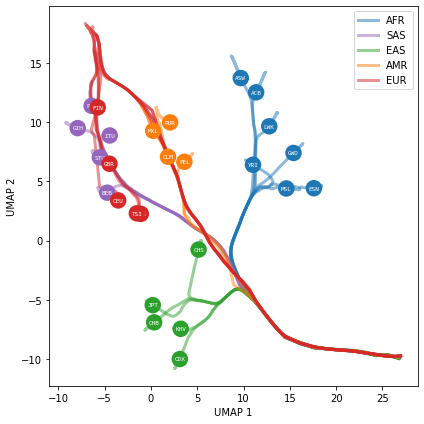

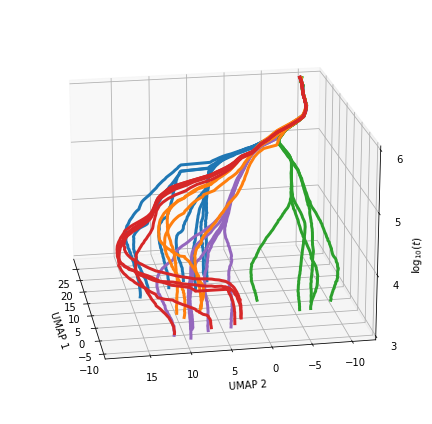

In [197]:
with mpl.rc_context(rc={'text.usetex': False}):

    plt.figure(figsize=(6, 6))
    # plt.subplot(311)
    for super_pop in pops:
        for idx2, pop in enumerate(pops[super_pop]):
            plt.plot(*Z_transform_dict[pop].T,
                     '-', lw=3, alpha=.5,
                     c=colors[super_pop],
                     label=super_pop if idx2 == 0 else None)
            plt.annotate(pop, Z_transform_dict[pop][0, :],
                         ha='center', va='center', c='w',
                         family='monospace',
                         bbox=dict(boxstyle='circle', fc=colors[super_pop], ec=colors[super_pop], lw=2),
                         size=6)
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.legend()
    plt.tight_layout()
    plt.savefig('plots/umap.pdf')
    

    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca(projection='3d')
    ax.view_init(20, 170)
    for super_pop in pops:
        for pop in pops[super_pop]:
            ax.plot(*Z_transform_dict[pop].T, np.log10(time[time_mask]),
                    '-', lw=3, alpha=1,
                    c=colors[super_pop],
                    label=super_pop if idx2 == 0 else None)
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_zlabel('$\log_{10}(t)$')
    ax.set_zticks([3, 4, 5, 6])
    ax.set_zlim([3, 6])
    plt.tight_layout()
    plt.savefig('plots/umap_3d.pdf')
